In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
import seaborn as sns
import datetime, warnings, scipy

In [74]:
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

In [75]:
data = pd.read_csv('file1.csv')
data.head()

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,347671,1,23,5,5,568,444,1650,1704.0,14.0,1745,1808.0,23.0,55.0,64.0
1,2730916,6,21,7,6,482,588,1523,1517.0,-6.0,1641,1634.0,-7.0,78.0,77.0
2,1903675,5,1,5,7,338,483,2000,1959.0,-1.0,2118,2059.0,-19.0,78.0,60.0
3,5089867,11,14,6,0,350,540,1705,1656.0,-9.0,2012,1949.0,-23.0,307.0,293.0
4,5691380,12,23,3,7,492,394,1346,1407.0,21.0,1623,1632.0,9.0,157.0,145.0


In [76]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)
data.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,1,23,5,5,568,444,1650,1704.0,14.0,1745,1808.0,23.0,55.0,64.0
1,6,21,7,6,482,588,1523,1517.0,-6.0,1641,1634.0,-7.0,78.0,77.0
2,5,1,5,7,338,483,2000,1959.0,-1.0,2118,2059.0,-19.0,78.0,60.0
3,11,14,6,0,350,540,1705,1656.0,-9.0,2012,1949.0,-23.0,307.0,293.0
4,12,23,3,7,492,394,1346,1407.0,21.0,1623,1632.0,9.0,157.0,145.0


In [107]:
data.AIRLINE.describe()

count    500000.000000
mean          5.938732
std           3.874769
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          13.000000
Name: AIRLINE, dtype: float64

In [77]:
data.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME'],
      dtype='object')

In [78]:
reg = LinearRegression()

In [79]:
X = data[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT',
         'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 
         'ARRIVAL_DELAY','SCHEDULED_TIME', 'ELAPSED_TIME']]
Y = data['DEPARTURE_DELAY']

In [81]:
X = X.values
Y = Y.values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3)

In [83]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(350000, 13) (150000, 13) (350000,) (150000,)


In [84]:
reg.fit(X_train,y_train)

LinearRegression()

In [85]:
predictions = reg.predict(X_test)

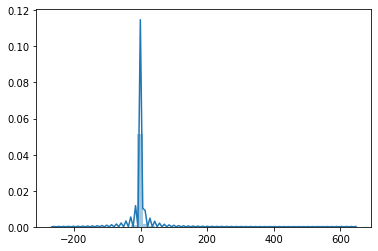

In [86]:
sns.distplot(y_test-predictions)

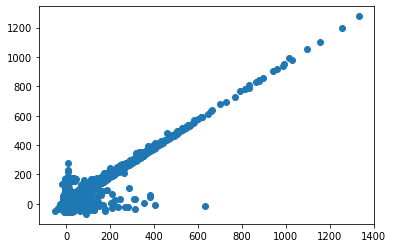

In [87]:
plt.scatter(y_test,predictions)

In [88]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((reg.predict(X_test) - y_test) ** 2)))

RMSE: 8.43


In [89]:
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6824987081363765
MSE: 71.091439637744
RMSE: 8.431573971551456


In [91]:
reg.score(X_train,y_train)

0.9481964178943637

In [92]:
reg.score(X_test,y_test)

0.9465495894037108

In [93]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [94]:
#traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method=None, validate_parameters=False, verbosity=None)

In [95]:
predictions1 = xgb.predict(X_train)
print(explained_variance_score(predictions1,y_train))

0.9840847331922135


In [96]:
predictions1 = xgb.predict(X_test)
print(explained_variance_score(predictions1,y_test))

0.9820335827843691


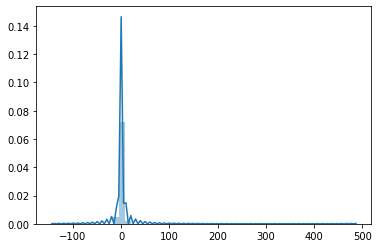

In [97]:
sns.distplot(y_test-predictions1)

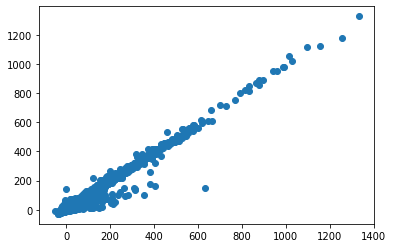

In [98]:
plt.scatter(y_test,predictions1)

In [99]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((xgb.predict(X_test) - y_test) ** 2)))

RMSE: 4.78


In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 2.708438261872538
MSE: 22.80721602314988
RMSE: 4.7756901096228885


In [101]:
import joblib
joblib.dump(xgb,"libia1.pkl")

['libia1.pkl']

In [102]:
y_train

array([ 92.,  -3., -10., ...,  10.,  16.,  -7.])

In [105]:

MONTH = 4
DAY = 27
DAY_OF_WEEK = 1
AIRLINE = 10
ORIGIN_AIRPORT = 522
DESTINATION_AIRPORT = 463
SCHEDULED_DEPARTURE = 915
DEPARTURE_TIME = 921.0
SCHEDULED_ARRIVAL = 952
ARRIVAL_TIME = 657.0
ARRIVAL_DELAY = 5.0
SCHEDULED_TIME = 37.0
ELAPSED_TIME = 36.0
pred_argss = [MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME]
pred_args_arr = np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)
mul_reg = open("libia1.pkl","rb")
ml_model = joblib.load(mul_reg)
model_prediction = ml_model.predict(pred_args_arr)
model_prediction[0] 

4.597264

In [42]:
X_train

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
232444,4,27,1,10,522,463,915,921.0,952,957.0,5.0,37.0,36.0
213117,2,19,4,13,392,419,845,844.0,950,935.0,-15.0,65.0,51.0
300805,10,28,3,5,133,160,530,532.0,645,645.0,0.0,195.0,193.0
114501,8,22,6,11,426,529,625,620.0,737,722.0,-15.0,72.0,62.0
46874,8,22,6,12,392,517,1513,1623.0,1549,1700.0,71.0,96.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466328,7,21,2,12,392,567,720,713.0,1000,1004.0,4.0,160.0,171.0
12728,6,16,2,5,538,604,1000,1020.0,1710,1726.0,16.0,250.0,246.0
331838,11,2,1,5,586,569,755,755.0,925,916.0,-9.0,90.0,81.0
170037,6,14,7,5,491,477,1200,1157.0,1325,1314.0,-11.0,205.0,197.0


In [ ]:
MONTH	DAY	DAY_OF_WEEK	AIRLINE	ORIGIN_AIRPORT	DESTINATION_AIRPORT	SCHEDULED_DEPARTURE	DEPARTURE_TIME	SCHEDULED_ARRIVAL	ARRIVAL_TIME	ARRIVAL_DELAY	SCHEDULED_TIME	ELAPSED_TIME
4	    27	1	         10	        522	                  463	               915	        921.0	         952	             957.0	        5.0	             37.0	       36.0

In [52]:
predictions = xgb.predict(X_test) 